<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KMT2A-PTD-at-10%-cell-fraction" data-toc-modified-id="KMT2A-PTD-at-10%-cell-fraction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KMT2A-PTD at 10% cell fraction</a></span></li><li><span><a href="#KMT2A-PTD-at-100%-cell-fraction" data-toc-modified-id="KMT2A-PTD-at-100%-cell-fraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KMT2A-PTD at 100% cell fraction</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [27]:
# import packages
import csv
import matplotlib
import matplotlib.pyplot as plt}
from matplotlib.lines import Line2D

In [3]:
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [4]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'
# yellow = '#ffffd4'

In [10]:
def KMT2A_coordinates_dict(KMT2A_coords):
    with open(KMT2A_coords, 'r') as csvfile:
        read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        KMT2A_coordinates = {}

        for row in read_reader:
            if row_count > 0:
                exon_intron = row[0]
                start = int(row[1])
                end = int(row[2])
                if exon_intron[0]=='E':
                    part = 'exon'
                else:
                    part = 'intron'
                KMT2A_coordinates[exon_intron]=(part, start, end)
            row_count+=1

    return KMT2A_coordinates

In [12]:
def KMT2A_panel_positions_list(KMT2A_coordinates, panel_bed, KMT2A_chromosome, KMT2A_start, KMT2A_stop):
    with open(panel_bed, 'r') as bedfile:
        read_reader = csv.reader(bedfile, delimiter = '\t')  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        KMT2A_panel_positions = []

        for row in read_reader:
            if row_count > 2:
                chromosome = row[0]
                start = int(row[1])
                stop = int(row[2])
                if chromosome == KMT2A_chromosome:
                    if start <  KMT2A_stop and stop > KMT2A_start:
                        for k, v in KMT2A_coordinates.items():
                            intron_exon_start = v[1]
                            intron_exon_stop = v[2]
                            region = k
                            if start < intron_exon_stop and stop > intron_exon_start:
                                KMT2A_panel_positions.append((chromosome, start, stop, region))

            row_count+=1

    return KMT2A_panel_positions

In [13]:
def KMT2A_panel_coverage(panel_bed):
    #panel coverage
    with open(panel_bed, 'r') as textfile:
        read_reader = csv.reader(textfile, delimiter = '\t')  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        panel_coverage = {}
        for row in read_reader:
            if row_count > 2:
                chromosome = row[0]
                start = int(row[1]) #start position of that part of the chromosome
                end = int(row[2]) #end position of that part of the chromosome

                if chromosome in panel_coverage.keys():
                    panel_coverage[chromosome].append((start, end))
                else:
                    panel_coverage[chromosome]=([(start, end)])

            row_count+=1

    return panel_coverage

In [14]:
def KMT2A_ideogram(KMT2A_coordinates):
    color_lookup = {'exon': '#cab2d6', 'intron': 'white'}

    xranges = []
    colors = []
    mid_points = []
    labels = []

    for k, v in KMT2A_coordinates.items():
        start = int(v[1])
        stop = int(v[2])
        label = k.split()[1]
        intron_or_exon = v[0]
        width = stop - start
        mid_point = start + (width/2)
        xranges.append((start, width))
        colors.append(color_lookup[intron_or_exon])
        if intron_or_exon == 'exon':

            mid_points.append(mid_point)
            labels.append(label)

    return xranges, [0, 1.0], colors, mid_points, labels

In [23]:
def plot_gene(KMT2A_coordinates, ax):

    xranges, yrange, colors, midpoints, labels = KMT2A_ideogram(KMT2A_coordinates)

    ax.broken_barh(xranges, yrange, facecolors= colors, edgecolor = 'black')

    ax.set_xticks(midpoints)
    ax.set_xticklabels(labels, rotation = 0, fontsize = 12)
    ax.set_yticks([])
    ax.text(-0.013, 0.35, 'KMT2A', transform=ax.transAxes, fontsize = 15, ha = 'right')
    ax.text(-0.013, -0.55, 'exons:', transform=ax.transAxes, fontsize = 12, ha = 'right')
    ax.xaxis.set_tick_params(width=0.8, color = grey3, length = 6)

    ax.minorticks_off()

    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return ax

In [25]:
def plot_regions_targeted_by_panel(panel_coverage, ax, y_max):

    regions_covered = panel_coverage['chr11']

    for positions in regions_covered:
        start_position = positions[0]
        stop_position = positions[1]

        bottom = 0
        top = y_max

        x = [start_position, start_position, stop_position, stop_position]
        y = [bottom, top, top, bottom]
        ax.fill(x, y, color= '#deebf7', fill = True, alpha = 1.0, linewidth = 1, zorder = 0) #fill in the box with stars

    return ax

In [30]:
def read_depths_cell_fraction(cell_fraction, exons_involved, KMT2A_panel_positions):
    
    normal_cell_fraction = 1-cell_fraction
    
    mean_read_depth = (1.5*cell_fraction)+(normal_cell_fraction) #multiply by 1.5 because there are 2 copies of KMT2A-PTD per cell so if one is duplicated, the total number in the cell will be 1.5x normal
    
    mean_intron_exon_depths = {}
    for region in KMT2A_panel_positions: #iterate over each of the probe regions in the panel...
        chromosome = region[0]
        start = region[1]
        stop = region[2]
        intron_exon = region[3]
        if intron_exon in exons_involved:
            mean_intron_exon_depths[(intron_exon, start, stop)]=mean_read_depth
        else:
            mean_intron_exon_depths[(intron_exon, start, stop)]=1
    
#     print(mean_intron_exon_depths)

    exon3_27ratio = mean_intron_exon_depths[('Exon 3', 118342376, 118345030)]/mean_intron_exon_depths[('Exon 27', 118373112, 118377361)]

    print('exon 3:27 ratio = ', exon3_27ratio)
    
    return mean_intron_exon_depths, exon3_27ratio

In [31]:
def read_depths_plot(KMT2A_start, KMT2A_stop, KMT2A_coordinates, panel_coverage, cell_fraction, exons_involved, KMT2A_panel_positions):
    plt.close('all')
    f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, sharex = True, figsize=(12, 4))
    gs = matplotlib.gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[10,1.5])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    gs.update(hspace=0.05)

    m_size = 100
    axisfont=15
    titlefont=15
    axislabelfont=15
    exonfont=12
    
    mean_intron_exon_depths, exon3_27ratio = read_depths_cell_fraction(cell_fraction, exons_involved, KMT2A_panel_positions)

    y_max = 1.75

    ax1.plot([KMT2A_start-500, KMT2A_stop+500], [1, 1], color = grey3, lw = 2, linestyle = ':')

    #gene IDEOGRAM
    plot_gene(KMT2A_coordinates, ax2)

    #REGIONS COVERED BY PANEL:
    plot_regions_targeted_by_panel(panel_coverage, ax1, y_max)

    #PLOT MEAN DEPTH ACROSS EACH EXON:
    for k, v in mean_intron_exon_depths.items():
        if k[0].split(' ')[0] == 'Exon':
            ax1.plot([k[1], k[2]], [v, v], color = c1, lw = 5)
            
    ax1.plot([KMT2A_start-500, KMT2A_stop+500], [exon3_27ratio, exon3_27ratio], color = c1, lw = 2, linestyle = ':')
    
    # CONFIGURING THE GRAPH APPEARANCE
    #Set the x and y axis limits
    ax1.set_xlim(KMT2A_start-500, KMT2A_stop+500)
    ax2.set_xlim(KMT2A_start-500, KMT2A_stop+500)
    ax1.set_ylim(0.25, y_max)

    #x-axis ticks
    x1_major_ticks = []
    x1_major_tick_labels = []
    ax1.set_xticks(x1_major_ticks)
    ax1.set_xticklabels(x1_major_tick_labels, fontsize = axisfont)

    ax1.tick_params(axis='y', which='major', labelsize=13)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(True)

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    for axis in ['left']:
        ax1.spines[axis].set_linewidth(1.5)
        ax1.spines[axis].set_color('#969696')
    ax1.yaxis.set_tick_params(width=1, color = '#969696', length = 6)

    legend_elements = [Line2D([0], [0], marker = 's', color='#deebf7', alpha=1.0, markersize = 12, \
                      lw=0, label='regions covered by TWIST CNV panel'),\
                  Line2D([0], [0], marker = '.', color=c1, alpha=1.0, markersize = 0, \
                      lw=3, label='mean normalised read depth across exon')]

    ax1.legend(ncol=2, handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 1.09), fontsize = 13)

    #Title and axis labels
#     ax1.set_title('Read depths (normalised to exon 27) across KMT2A', y=1.125, fontsize = titlefont, fontweight='bold')
    ax1.set_ylabel('normalised read depth', fontsize = axislabelfont)

    ax1.text(0.01, 0.95, 'exon 3: exon 27 depth ratio = '+str(round(exon3_27ratio, 2)), transform=ax1.transAxes, fontsize = 14, ha = 'left')
    ax1.text(0.985, 1.0, 'cell fraction: '+str(int(cell_fraction*100))+'%', transform = ax1.transAxes, fontsize = 14, ha = 'right', va = 'top')

    plt.tight_layout()
    
    return plt.show() 

In [32]:
KMT2A_coords = 'Data_files/KMT2A_coordinates_hg19.csv'
panel_bed = 'Data_files/TWIST_CNV_panel_TE-95031423_h19.bed'

KMT2A_chromosome = 'chr11'
KMT2A_start = 118339490
KMT2A_stop = 118377361

In [33]:
KMT2A_coordinates = KMT2A_coordinates_dict(KMT2A_coords)
KMT2A_panel_positions = KMT2A_panel_positions_list(KMT2A_coordinates, panel_bed, KMT2A_chromosome, KMT2A_start, KMT2A_stop)
panel_coverage = KMT2A_panel_coverage(panel_bed)
KMT2A_intron_exon_positions = KMT2A_ideogram(KMT2A_coordinates)

# KMT2A-PTD at 10% cell fraction

exon 3:27 ratio =  1.05


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


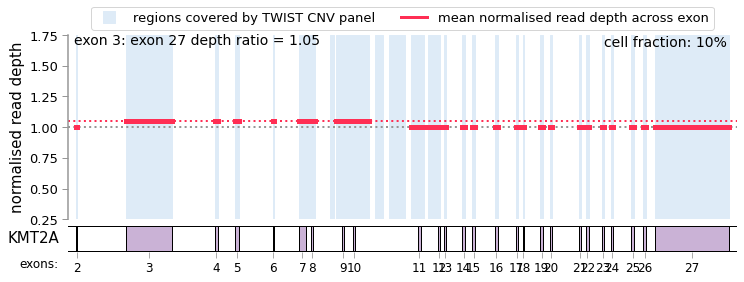

In [34]:
read_depths_plot(KMT2A_start, KMT2A_stop, KMT2A_coordinates, panel_coverage, 0.1, ['Exon 3', 'Exon 4', 'Exon 5', 'Exon 6', 'Exon 7', 'Exon 8', 'Exon 9', 'Exon 10'], KMT2A_panel_positions)

# KMT2A-PTD at 100% cell fraction

exon 3:27 ratio =  1.5


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


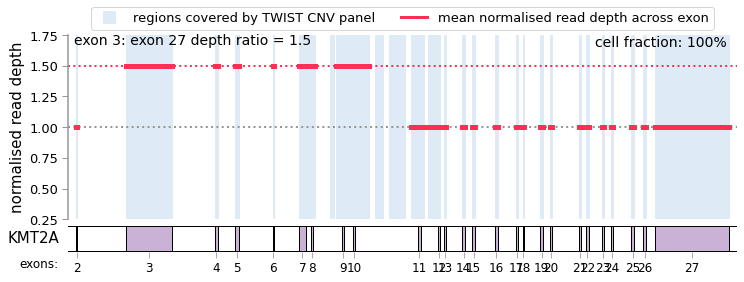

In [35]:
read_depths_plot(KMT2A_start, KMT2A_stop, KMT2A_coordinates, panel_coverage, 1.0, ['Exon 3', 'Exon 4', 'Exon 5', 'Exon 6', 'Exon 7', 'Exon 8', 'Exon 9', 'Exon 10'], KMT2A_panel_positions)